<a href="https://colab.research.google.com/github/Hienquang/AirbnbCapstone/blob/main/Modeling_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pycaret

In [ ]:
#pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import copy

from sklearn.model_selection import train_test_split
from pycaret.regression import *
import shap
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# Load data
df = pd.read_csv('listings_cleaned_updated.csv')

In [ ]:
df.head()

,id,description,neighborhood_overview,host_id,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,reviews_per_month,host_in_SD
0,5570,True,True,8435,"San Diego, California, United States",True,within a few hours,100%,100%,False,Mission Beach,3.0,True,True,Mission Bay,32.78430,-117.25258,condominium,Entire home/apt,6,1 bath,2.0,4.0,"['Stove', 'Smoke alarm', 'Refrigerator', 'Kitc...",2050.0,3,365,NaN,False,NaN,False
1,29967,True,False,129123,"San Diego, California, United States",True,within an hour,100%,50%,False,Pacific Beach,7.0,True,True,Pacific Beach,32.80724,-117.25630,bungalow,Entire home/apt,8,2 baths,2.0,3.0,"['Hot water', 'Smoke alarm', 'Kitchen', 'Hair ...",225.0,4,365,98.0,False,0.48,True
2,38245,True,True,164137,"San Diego, California, United States",True,NaN,NaN,86%,False,Loma Portal,3.0,True,True,Roseville,32.74202,-117.21870,house,Private room,1,1 shared bath,1.0,1.0,"['Hot water', 'Smoke alarm', 'Kitchen', 'First...",74.0,1,21,86.0,False,1.13,True
3,54001,True,True,252692,"San Diego, California, United States",True,within an hour,100%,75%,True,La Jolla,5.0,True,True,La Jolla,32.81301,-117.26856,guesthouse,Entire home/apt,3,1 bath,2.0,3.0,"['Hot water', 'Keurig coffee machine', 'Beach ...",85.0,28,1125,99.0,False,2.02,True
4,62274,True,True,302986,"San Diego, California, United States",True,within an hour,100%,96%,True,Pacific Beach,2.0,True,True,Pacific Beach,32.80734,-117.24243,guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"['Hot water', 'Smoke alarm', 'Refrigerator', '...",73.0,1,30,96.0,False,5.06,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9274 non-null   int64  
 1   description             9274 non-null   bool   
 2   neighborhood_overview   9274 non-null   bool   
 3   host_id                 9274 non-null   int64  
 4   host_location           9260 non-null   object 
 5   host_about              9274 non-null   bool   
 6   host_response_time      8146 non-null   object 
 7   host_response_rate      8146 non-null   object 
 8   host_acceptance_rate    8657 non-null   object 
 9   host_is_superhost       9274 non-null   bool   
 10  host_neighbourhood      8323 non-null   object 
 11  host_listings_count     9274 non-null   float64
 12  host_has_profile_pic    9274 non-null   bool   
 13  host_identity_verified  9274 non-null   bool   
 14  neighbourhood           9274 non-null   

In [ ]:
# drop id columns to keep only relevant information
df = df.drop(columns =['id', 'host_id','amenities'])

In [ ]:
df.sample(3)

,description,neighborhood_overview,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,reviews_per_month,host_in_SD
3165,True,True,"San Diego, California, United States",True,within an hour,100%,100%,True,Ocean Beach,1.0,True,True,Ocean Beach,32.75135,-117.24965,apartment,Entire home/apt,6,1 bath,2.0,3.0,165.0,1,30,94.0,True,1.77,True
6074,True,True,"Murrieta, California, United States",True,within an hour,95%,100%,True,Ocean Beach,0.0,True,True,Ocean Beach,32.74585,-117.24866,cottage,Entire home/apt,4,1 bath,1.0,3.0,97.0,1,28,99.0,True,7.92,True
6887,True,True,US,True,NaN,NaN,NaN,False,Gaslamp,4.0,True,True,Gaslamp Quarter,32.71487,-117.15976,serviced apartment,Entire home/apt,4,1 bath,1.0,2.0,199.0,1,1125,NaN,True,NaN,False


In [ ]:
#wrangle bathrooms_text to a better format
#create bathrooms dataframe
bathrooms = pd.DataFrame(copy.deepcopy(df['bathrooms_text']))
bathrooms = bathrooms.rename({'bathrooms_text':"bath_count"},axis=1)
bathrooms = bathrooms.assign(bath_shared = np.nan)
bathrooms.head()

,bath_count,bath_shared
0,1 bath,NaN
1,2 baths,NaN
2,1 shared bath,NaN
3,1 bath,NaN
4,1 bath,NaN


In [ ]:
bathrooms['bath_count'] = bathrooms['bath_count'].replace('Shared half-bath','0.5 shared bath')
bathrooms['bath_count'] = bathrooms['bath_count'].replace('Half-bath','0.5 bath')
bathrooms.bath_count.fillna(value="0",inplace=True)

In [ ]:
#extract private/shared baths
for idx, val in bathrooms['bath_count'].iteritems():
  if 'shared' in val:
    bathrooms.iloc[idx,1]=1
  else:
      bathrooms.iloc[idx,1]=0

In [ ]:
#Extract number of bathrooms
bathrooms.bath_count = bathrooms.bath_count.str.replace('baths','')
bathrooms.bath_count = bathrooms.bath_count.str.replace('bath','')
bathrooms.bath_count = bathrooms.bath_count.str.replace('shared','')
bathrooms.bath_count = bathrooms.bath_count.str.replace('private','')
bathrooms.bath_count = bathrooms.bath_count.str.replace(" ", "")
bathrooms.bath_count = bathrooms.bath_count.astype('float')
bathrooms.sample(5)

,bath_count,bath_shared
102,1.0,0.0
7237,1.0,0.0
5237,1.0,0.0
8918,1.0,0.0
5022,2.0,0.0


In [ ]:
#transfer new columns to main dataframe
df['bath_count'] = bathrooms.bath_count
df['bath_shared'] = bathrooms.bath_shared
#drop bathroom_text
df.drop(columns=['bathrooms_text'], inplace=True)

In [ ]:
# Let's take a look at the current dataframe
df.sample(5)

,description,neighborhood_overview,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,reviews_per_month,host_in_SD,bath_count,bath_shared
6920,False,False,"Oceanside, California, United States",True,within a few hours,100%,15%,False,Mission Valley East,6.0,True,False,West University Heights,32.76132,-117.15919,condominium,Entire home/apt,4,1.0,0.0,196.0,2,1125,NaN,False,NaN,False,2.0,0.0
590,True,False,"San Diego, California, United States",True,within an hour,100%,100%,False,Bay Park,4.0,True,False,Bay Park,32.80634,-117.20556,house,Private room,2,1.0,1.0,159.0,2,1125,97.0,True,0.10,True,1.0,1.0
3222,True,True,"San Diego, California, United States",True,within an hour,100%,95%,True,La Jolla,168.0,True,True,Mission Bay,32.76260,-117.25051,townhouse,Entire home/apt,8,3.0,5.0,288.0,1,365,94.0,False,0.28,True,2.5,0.0
1148,True,True,"San Diego, California, United States",True,within an hour,100%,100%,True,Ocean View Hills,1.0,True,False,Amphitheater And Water Park,32.58239,-117.00378,house,Private room,4,1.0,2.0,50.0,2,1125,92.0,True,1.67,False,1.0,1.0
3627,True,False,"West Hollywood, California, United States",True,within an hour,96%,98%,False,Pacific Beach,296.0,True,True,East Village,32.71016,-117.14966,condominium,Entire home/apt,8,3.0,5.0,373.0,1,365,96.0,False,2.45,True,2.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   description             9274 non-null   bool   
 1   neighborhood_overview   9274 non-null   bool   
 2   host_location           9260 non-null   object 
 3   host_about              9274 non-null   bool   
 4   host_response_time      8146 non-null   object 
 5   host_response_rate      8146 non-null   object 
 6   host_acceptance_rate    8657 non-null   object 
 7   host_is_superhost       9274 non-null   bool   
 8   host_neighbourhood      8323 non-null   object 
 9   host_listings_count     9274 non-null   float64
 10  host_has_profile_pic    9274 non-null   bool   
 11  host_identity_verified  9274 non-null   bool   
 12  neighbourhood           9274 non-null   object 
 13  latitude                9274 non-null   float64
 14  longitude               9274 non-null   

In [ ]:
#fill in missing data
df.fillna({x:'unknown' for x in ['host_location','host_response_time','host_response_rate',
    'host_acceptance_rate','host_neighbourhood']}, inplace=True)
df.fillna({x:0 for x in ['bedrooms','beds','review_scores_rating','reviews_per_month']}, inplace=True)

In [ ]:
#remove suspicious outliers in data 
df = df[df.price != 24999]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9267 entries, 0 to 9273
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   description             9267 non-null   bool   
 1   neighborhood_overview   9267 non-null   bool   
 2   host_location           9267 non-null   object 
 3   host_about              9267 non-null   bool   
 4   host_response_time      9267 non-null   object 
 5   host_response_rate      9267 non-null   object 
 6   host_acceptance_rate    9267 non-null   object 
 7   host_is_superhost       9267 non-null   bool   
 8   host_neighbourhood      9267 non-null   object 
 9   host_listings_count     9267 non-null   float64
 10  host_has_profile_pic    9267 non-null   bool   
 11  host_identity_verified  9267 non-null   bool   
 12  neighbourhood           9267 non-null   object 
 13  latitude                9267 non-null   float64
 14  longitude               9267 non-null   

In [ ]:
#use pycaret to get baseline models
# setup the dataset
grid = setup(data=df, target='price', session_id = 42)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,8.898580e+01,8.843717e+04,2.774652e+02,3.772000e-01,0.5194,4.671000e-01,0.313
rf,Random Forest Regressor,7.827350e+01,8.712803e+04,2.770872e+02,3.397000e-01,0.4354,3.716000e-01,19.591
br,Bayesian Ridge,1.016227e+02,9.707396e+04,2.893947e+02,3.317000e-01,0.7094,6.132000e-01,2.096
lasso,Lasso Regression,1.003021e+02,9.755420e+04,2.896762e+02,3.314000e-01,0.6503,5.829000e-01,0.121
ridge,Ridge Regression,1.132242e+02,9.936143e+04,2.949442e+02,2.980000e-01,0.8317,7.363000e-01,0.126
omp,Orthogonal Matching Pursuit,1.112825e+02,1.001828e+05,2.961379e+02,2.923000e-01,0.8166,7.017000e-01,0.131
en,Elastic Net,1.009071e+02,1.017875e+05,2.974381e+02,2.915000e-01,0.6211,6.069000e-01,0.082
gbr,Gradient Boosting Regressor,8.872650e+01,9.868847e+04,2.951061e+02,2.840000e-01,0.5111,4.819000e-01,5.442
et,Extra Trees Regressor,7.600620e+01,9.027132e+04,2.770742e+02,2.594000e-01,0.4218,3.282000e-01,27.431
huber,Huber Regressor,9.161110e+01,1.080697e+05,3.075620e+02,2.389000e-01,0.5355,3.997000e-01,4.111


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# None of the models did well
# Mean absolute error of over $100 is too much for this application
# The reason could be that there are 2 drasticly different type of price segmentation in the data
# It's unlikely that the outliers of super luxurious rentals would help with the typical pricing anyways
# Let's try to eliminate listing with price that is above $1000
df_filtered = df[df['price'] <= 1000]
print(df_filtered.shape)

(9114, 29)


In [ ]:
df_filtered.price.describe()

count    9114.000000
mean      187.249177
std       161.136801
min        20.000000
25%        87.000000
50%       132.000000
75%       228.000000
max      1000.000000
Name: price, dtype: float64

In [ ]:
#Try Pycaret again
grid = setup(data=df_filtered, target='price', session_id = 42)
best = compare_models()
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,54.1981,8945.4116,94.3155,0.6664,0.3754,0.3141,0.318
rf,Random Forest Regressor,53.1702,9290.5020,96.0227,0.6532,0.3679,0.2973,16.510
gbr,Gradient Boosting Regressor,57.5852,9517.4696,97.2373,0.6461,0.4000,0.3516,5.343
et,Extra Trees Regressor,53.2139,9587.7654,97.6113,0.6424,0.3700,0.2905,22.874
br,Bayesian Ridge,63.9954,10718.6562,103.1622,0.6019,0.5421,0.4147,2.134
ridge,Ridge Regression,64.6691,10856.0260,103.7901,0.5966,0.5735,0.4247,0.126
omp,Orthogonal Matching Pursuit,64.8215,11217.9535,105.5376,0.5838,0.5387,0.4171,0.129
lasso,Lasso Regression,68.1173,11929.7562,108.8246,0.5579,0.5157,0.4426,0.115
en,Elastic Net,71.4928,12750.5098,112.6714,0.5277,0.5200,0.4973,0.085
huber,Huber Regressor,68.9816,14094.8945,118.5194,0.4781,0.4890,0.3880,4.934


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# Removing outliers has drasticly improved the models' performance.
# Let's tune the best model which is Light Gradient Boosting Machine
tuned = tune_model(best,optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,58.8910,11201.8570,105.8388,0.6325,0.3948,0.3374
1,58.1656,11524.3602,107.3516,0.6043,0.3969,0.2995
2,54.7202,8371.6596,91.4968,0.6962,0.3774,0.3253
3,53.1397,7868.7942,88.7062,0.7066,0.3794,0.3220
4,54.6592,7874.4361,88.7380,0.7212,0.3776,0.3215
5,55.3407,9830.4166,99.1485,0.6236,0.3934,0.3323
6,53.4761,8747.9405,93.5304,0.5713,0.3887,0.3176
7,51.2321,9609.2713,98.0269,0.5647,0.3844,0.2974
8,54.9721,8178.0841,90.4328,0.7119,0.4056,0.3375
9,55.9118,8386.0005,91.5751,0.7422,0.4068,0.3456


In [ ]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

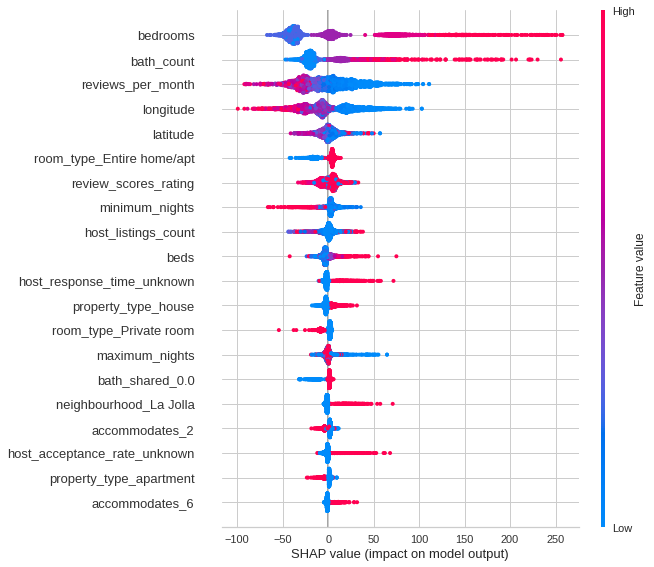

In [ ]:
interpret_model(tuned)